Sammon Mapping (https://www.semanticscholar.org/paper/A-Nonlinear-Mapping-for-Data-Structure-Analysis-Sammon/154f8a9906bcc99fca9b17aa521649b1c3734093?p2df) is one of the first nonlinear dimensionality reduction algorithms, and it is still used today as a benchmark due to its flexibility and good results. 

What differentiated Sammon Mapping from other multidimensional scaling algorithms proposed at the time was the use of non-linear scaling, as opposed to most MDS techniques which scaled all distances by the same value


We implement Sammon Mapping by:

1 - Start with a random two-dimensional layout Y of points.

2 - Compute the stress E of Y.

3 - If E < epsilon, or if the maximum number of iterations iter has been reached, stop.

4 - For each y of Y , find the next vector y(t + 1) based on the current y(t).
 
5 - Repeat from step 2.

In [352]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

Function to calculate the c constant based on distance matrix

In [353]:
def C(distances):
  c = 0
  for i in range(distances.shape[0]):
    for j in range(distances.shape[0]):
      if (i < j):
        c += distances[i, j]

  return c

Function to calculate Sammon stress based on distance matrices for the higher and lower dimension (in_distances, out_distances) and a constant c as calculated by the C function

In [354]:
def sammonStress(in_distances, out_distances, c):
  E = 0
  for i in range(in_distances.shape[0]):
    for j in range(in_distances.shape[0]):
      if (i < j):
        E += ((out_distances[i, j] - in_distances[i, j]) ** 2) / in_distances[i, j]
  return E / c

Sammon mapping function, returns a two dimensional numpy array

In [355]:
def sammon(X, iter=500, epsilon=1e-7, alpha=0.3):
  rows = X.shape[0]

  #random two-dimensional layout of points
  y = np.random.normal(0.0, 1.0, [rows, 2])

  in_distances = metrics.pairwise_distances(X)
  c = C(in_distances)
  print(f'c={c}')
  
  stress_old = np.inf
  
  for epoch in range(1, iter+1):
    out_distances = metrics.pairwise_distances(y)
    
    stress = sammonStress(in_distances, out_distances, c)

    print(f'Epoch {epoch} Sammon stress: {stress}')
    if (stress_old - stress < epsilon):
      break

    stress_old = stress

    partial_der1 = np.array([0,0])
    partial_der2 = np.array([0,0])

    for i in range(rows):
      #calculate sum part of the partial derivatives
      for j in range(rows):
        if (i != j):
          denominator = out_distances[i, j] * in_distances[i, j]
          difference = out_distances[i, j] - in_distances[i, j]

          y_difference = np.subtract(y[i], y[j])

          if (denominator < 0.000001):
            print(f'denominator = {denominator} set to 0.000001')
            denominator = 0.000001

          partial_der1 = partial_der1 + np.multiply(difference / denominator, y_difference)
          partial_der2 = partial_der2 + (1 / denominator) * (difference - np.divide(np.square(y_difference), in_distances[i, j]) * (1 + difference / in_distances[i, j]))

      partial_der1 = (-2 / c) * partial_der1
      partial_der2 = (-2 / c) * partial_der2

      #update y[i]
      y[i] = y[i] + alpha * (partial_der1 / np.abs(partial_der2))

  return y

Test the sammon function on the iris dataset

c=28109.15505661856
Epoch 1 Sammon stress: 0.8849065566396013
Epoch 2 Sammon stress: 0.849657888150743
Epoch 3 Sammon stress: 0.8186309211838186
Epoch 4 Sammon stress: 0.7912119266161178
Epoch 5 Sammon stress: 0.7668991327813458
Epoch 6 Sammon stress: 0.7454866253290768
Epoch 7 Sammon stress: 0.7263106603022159
Epoch 8 Sammon stress: 0.7088560311741404
Epoch 9 Sammon stress: 0.6930759776226834
Epoch 10 Sammon stress: 0.6785788368358862
Epoch 11 Sammon stress: 0.6647797440505779
Epoch 12 Sammon stress: 0.6512514629094551
Epoch 13 Sammon stress: 0.6376582339794103
Epoch 14 Sammon stress: 0.6236687217437303
Epoch 15 Sammon stress: 0.6089770778639397
Epoch 16 Sammon stress: 0.5931248226798823
Epoch 17 Sammon stress: 0.5757711659792935
Epoch 18 Sammon stress: 0.556822833922058
Epoch 19 Sammon stress: 0.5360849042950665
Epoch 20 Sammon stress: 0.5134421564011411
Epoch 21 Sammon stress: 0.4894853040976821
Epoch 22 Sammon stress: 0.46432230084521775
Epoch 23 Sammon stress: 0.4392636340243672
E

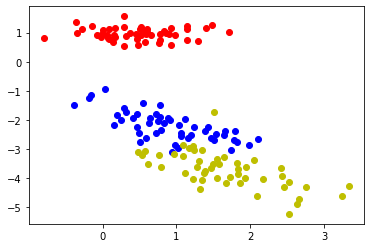

In [356]:
if __name__ == "__main__":
  iris = datasets.load_iris()
  (X,index) = np.unique(iris.data,axis=0,return_index=True)

  target = iris.target[index]

  y = sammon(X, alpha=1)
  

  plt.scatter(y[target ==0, 0], y[target ==0, 1], c='r')
  plt.scatter(y[target ==1, 0], y[target ==1, 1], c='b')
  plt.scatter(y[target ==2, 0], y[target ==2, 1], c='y')
  plt.show()